In [1]:
import pandas as pd, matplotlib.pyplot as plt, geopandas as gpd, contextily as ctx, numpy as np

In [2]:
caba = gpd.read_file(
    r"C:\Users\leand_5odr3v\Desktop\rocio python\Data met4op\simulacion\geo\CABA.shp")

In [3]:
caba.head()


,distrito,provincia,departamen,cabecera,circuito,indec_p,indec_d,geometry
0,01,Ciudad Autónoma de Buenos Aires,Comuna 1,Comuna 1,0003,02,001,"POLYGON Z ((-6496304.252 -4084732.697 0.000, -..."
1,01,Ciudad Autónoma de Buenos Aires,Comuna 4,Comuna 4,0045,02,004,"POLYGON Z ((-6501230.474 -4091702.182 0.000, -..."
2,01,Ciudad Autónoma de Buenos Aires,Comuna 3,Comuna 3,0037,02,003,"POLYGON Z ((-6501166.688 -4087904.826 0.000, -..."
3,01,Ciudad Autónoma de Buenos Aires,Comuna 1,Comuna 1,0018,02,001,"POLYGON Z ((-6498832.986 -4088373.028 0.000, -..."
4,01,Ciudad Autónoma de Buenos Aires,Comuna 13,Comuna 13,0141,02,013,"POLYGON Z ((-6503862.400 -4078547.361 0.000, -..."


In [4]:
pp2 = pd.read_csv(
    r'C:\Users\leand_5odr3v\Desktop\rocio python\Data met4op\simulacion\elecciones\pp2.csv',  # file path
    delimiter=',',
    header=0,
    names=None,
    index_col=0,
    usecols=None,
    dtype=None,
    skiprows=None,
    skipfooter=0,
    nrows=None,
    decimal='.',
    quotechar='"',
)
pp2

,pp2
NaN,sum
circuito,NaN
1,2113
2,2122
3,812
...,...
163,2276
164,1900
165,3588
166,2569


In [5]:
pp2 = pp2.reset_index()

In [6]:
pp2

,index,pp2
0,NaN,sum
1,circuito,NaN
2,1,2113
3,2,2122
4,3,812
...,...,...
164,163,2276
165,164,1900
166,165,3588
167,166,2569


In [7]:
pp2 = pp2.rename(columns={'index':'circuito'})

In [8]:
pp2

,circuito,pp2
0,NaN,sum
1,circuito,NaN
2,1,2113
3,2,2122
4,3,812
...,...,...
164,163,2276
165,164,1900
166,165,3588
167,166,2569


In [9]:
pp2 = pp2.drop([0, 1],axis=0)

In [10]:
pp2 = pp2.astype({"circuito":int})
pp2.dtypes

circuito     int32
pp2         object
dtype: object

In [11]:
caba = caba.astype({"circuito":int})
caba.dtypes

distrito        object
provincia       object
departamen      object
cabecera        object
circuito         int32
indec_p         object
indec_d         object
geometry      geometry
dtype: object

In [12]:
mapa_left = pd.merge(caba, pp2, on="circuito", how="inner")
mapa_left

,distrito,provincia,departamen,cabecera,circuito,indec_p,indec_d,geometry,pp2
0,01,Ciudad Autónoma de Buenos Aires,Comuna 1,Comuna 1,3,02,001,"POLYGON Z ((-6496304.252 -4084732.697 0.000, -...",812
1,01,Ciudad Autónoma de Buenos Aires,Comuna 4,Comuna 4,45,02,004,"POLYGON Z ((-6501230.474 -4091702.182 0.000, -...",3134
2,01,Ciudad Autónoma de Buenos Aires,Comuna 3,Comuna 3,37,02,003,"POLYGON Z ((-6501166.688 -4087904.826 0.000, -...",2572
3,01,Ciudad Autónoma de Buenos Aires,Comuna 1,Comuna 1,18,02,001,"POLYGON Z ((-6498832.986 -4088373.028 0.000, -...",2084
4,01,Ciudad Autónoma de Buenos Aires,Comuna 13,Comuna 13,141,02,013,"POLYGON Z ((-6503862.400 -4078547.361 0.000, -...",1725
...,...,...,...,...,...,...,...,...,...
162,01,Ciudad Autónoma de Buenos Aires,Comuna 13,Comuna 13,135,02,013,"POLYGON Z ((-6507834.614 -4077215.626 0.000, -...",1460
163,01,Ciudad Autónoma de Buenos Aires,Comuna 14,Comuna 14,149,02,014,"POLYGON Z ((-6503253.371 -4080723.227 0.000, -...",3007
164,01,Ciudad Autónoma de Buenos Aires,Comuna 9,Comuna 9,101,02,009,"POLYGON Z ((-6515182.479 -4090061.116 0.000, -...",3835
165,01,Ciudad Autónoma de Buenos Aires,Comuna 10,Comuna 10,102,02,010,"POLYGON Z ((-6514598.831 -4088679.114 0.000, -...",1536


In [27]:
mapa_left = mapa_left.astype({"pp2":int})
mapa_left.dtypes

distrito        object
provincia       object
departamen      object
cabecera        object
circuito         int32
indec_p         object
indec_d         object
geometry      geometry
pp2              int32
logRatio        object
dtype: object

<AxesSubplot:>

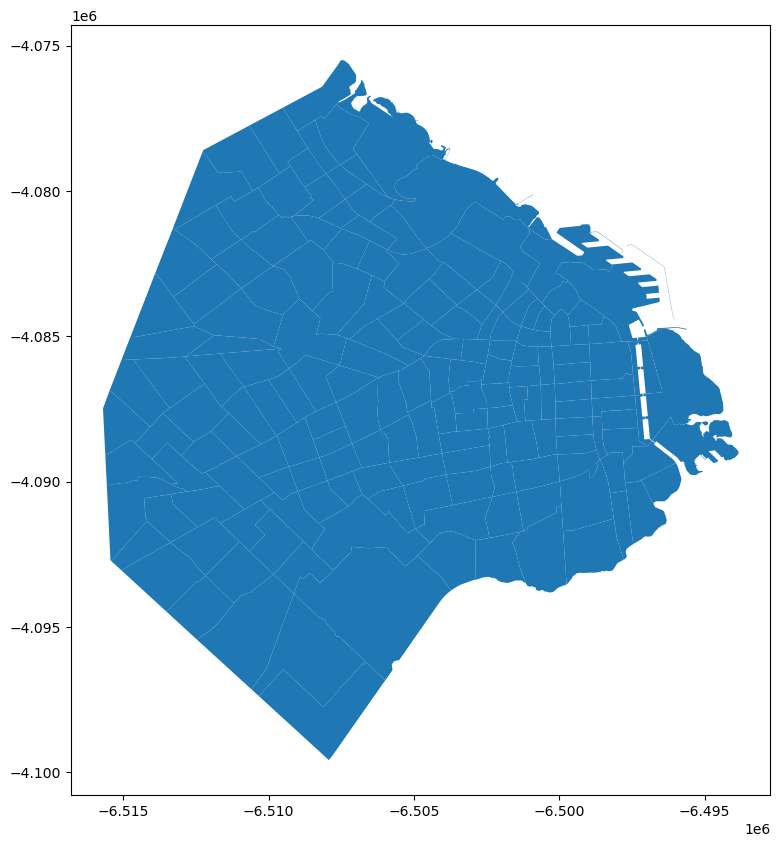

In [16]:
mapa_left.plot(figsize=(20, 10))

<AxesSubplot:>

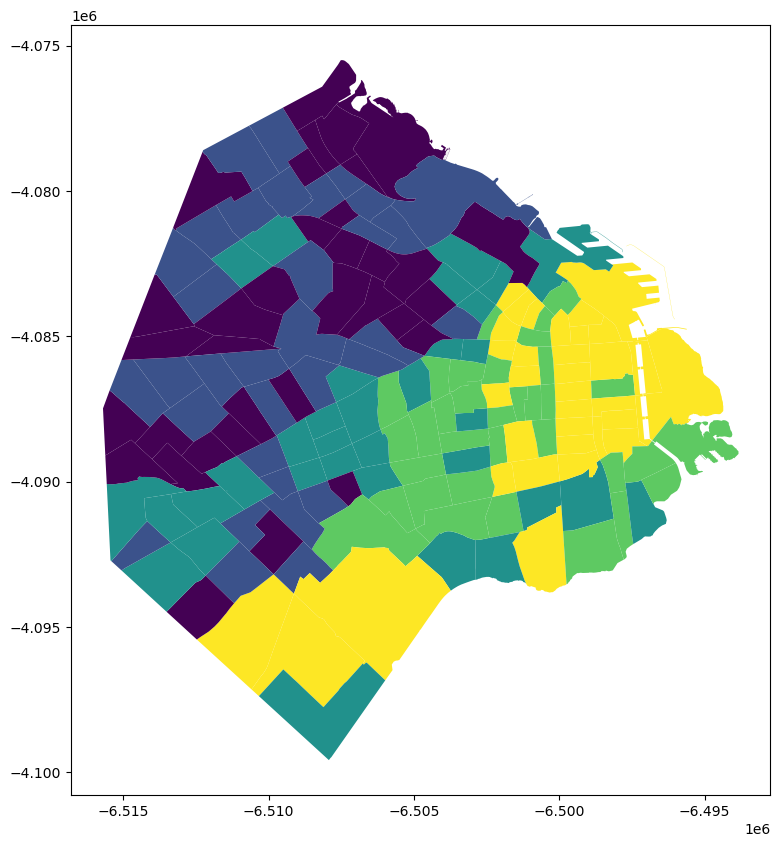

In [28]:

mapa_left['logRatio'] = (mapa_left.pp2/ mapa_left.circuito)
mapa_left.plot(column='logRatio', scheme='quantiles', figsize=(10, 10))